In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from dataset_functions import *
#branch loda
dataset_path = "../dataset/mlcourse-dota2-win-prediction/train_features.csv"

In [19]:
df, target = get_dataset()
#df, target = playerstats_teamheros_transform(df,target)
#df, target = playerstats_playerheros_transform(df,target)
df, target = teamstats_teamheros_transform(df,target)
df = team_weighted_mean_position_transform(df)
print(f"columns now {df.columns}" )

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243) 

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 463) 

NaN Count:  0 

Single Hero

In [20]:
win = target["radiant_win"].astype(int)
#X = np.array(df.values)
#Y = np.array(win)


In [21]:
np.random.seed(seed=10)

X_train,X_test,Y_train,Y_test = train_test_split(df,win,test_size=0.2)

In [22]:
feature_selector = RandomForestClassifier(max_depth=10,class_weight="balanced")

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#
#pca = PCA(n_components=0.999)
#X_train = pca.fit_transform(X_train)
#X_test = pca.fit_transform(X_test)

feature_selector.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [23]:
Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

print(X_train)

Accouracy  0.7117089099673457
Auc 0.7094009586863647
       game_time  objectives_len  r1_x  r1_y  r2_x  r2_y  r3_x  r3_y  r4_x  \
31126       1146               4   162   100   106   102   120   110    72   
7437        1325               5   130    96   132    98    78   152    74   
9024         183               0   172    92   174    94    80   144   126   
3512         199               1   186    98   122   126   186    98    84   
30830       3499              20   118   138   124   134    90   138   138   
...          ...             ...   ...   ...   ...   ...   ...   ...   ...   
34588       2112              12   182   166   182   162   178   176   178   
21792        268               1    72    74   166    76   172    80    80   
36038        978               3   176    94   164   104    80   166   144   
8808        1247               6    78   148   128    86    80   142    74   
21717        300               1   118   114    76   154    90   144   174   

       r4_

In [24]:
Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

print(X_train)

feature_importance = {
    name: value 
    for name,value in zip(feature_selector.feature_names_in_,feature_selector.feature_importances_)
}

# Feature importance
#feature_importance = feature_selector.feature_importances_
#print(feature_importance)

feature_importance = dict(reversed(sorted(feature_importance.items(), key=lambda item: item[1])))
print(feature_importance)
feature_names = list(feature_importance.keys())[:10]
#print(list(feature_importance.keys())[-10:])
#print(feature_names)
print(list(feature_importance.keys()))
#print(feature_importance["d_58"])
#print(feature_importance["d_68"])
#print(feature_importance["r_32"])
#print(feature_importance["d_32"]) 
#print(feature_importance["r2_y"])
#print(feature_importance["d_towers_killed"])
#print(feature_importance["objectives_len"])
#print(feature_importance["d_teamfight_participation"])

Accouracy  0.7117089099673457
Auc 0.7094009586863647
       game_time  objectives_len  r1_x  r1_y  r2_x  r2_y  r3_x  r3_y  r4_x  \
31126       1146               4   162   100   106   102   120   110    72   
7437        1325               5   130    96   132    98    78   152    74   
9024         183               0   172    92   174    94    80   144   126   
3512         199               1   186    98   122   126   186    98    84   
30830       3499              20   118   138   124   134    90   138   138   
...          ...             ...   ...   ...   ...   ...   ...   ...   ...   
34588       2112              12   182   166   182   162   178   176   178   
21792        268               1    72    74   166    76   172    80    80   
36038        978               3   176    94   164   104    80   166   144   
8808        1247               6    78   148   128    86    80   142    74   
21717        300               1   118   114    76   154    90   144   174   

       r4_

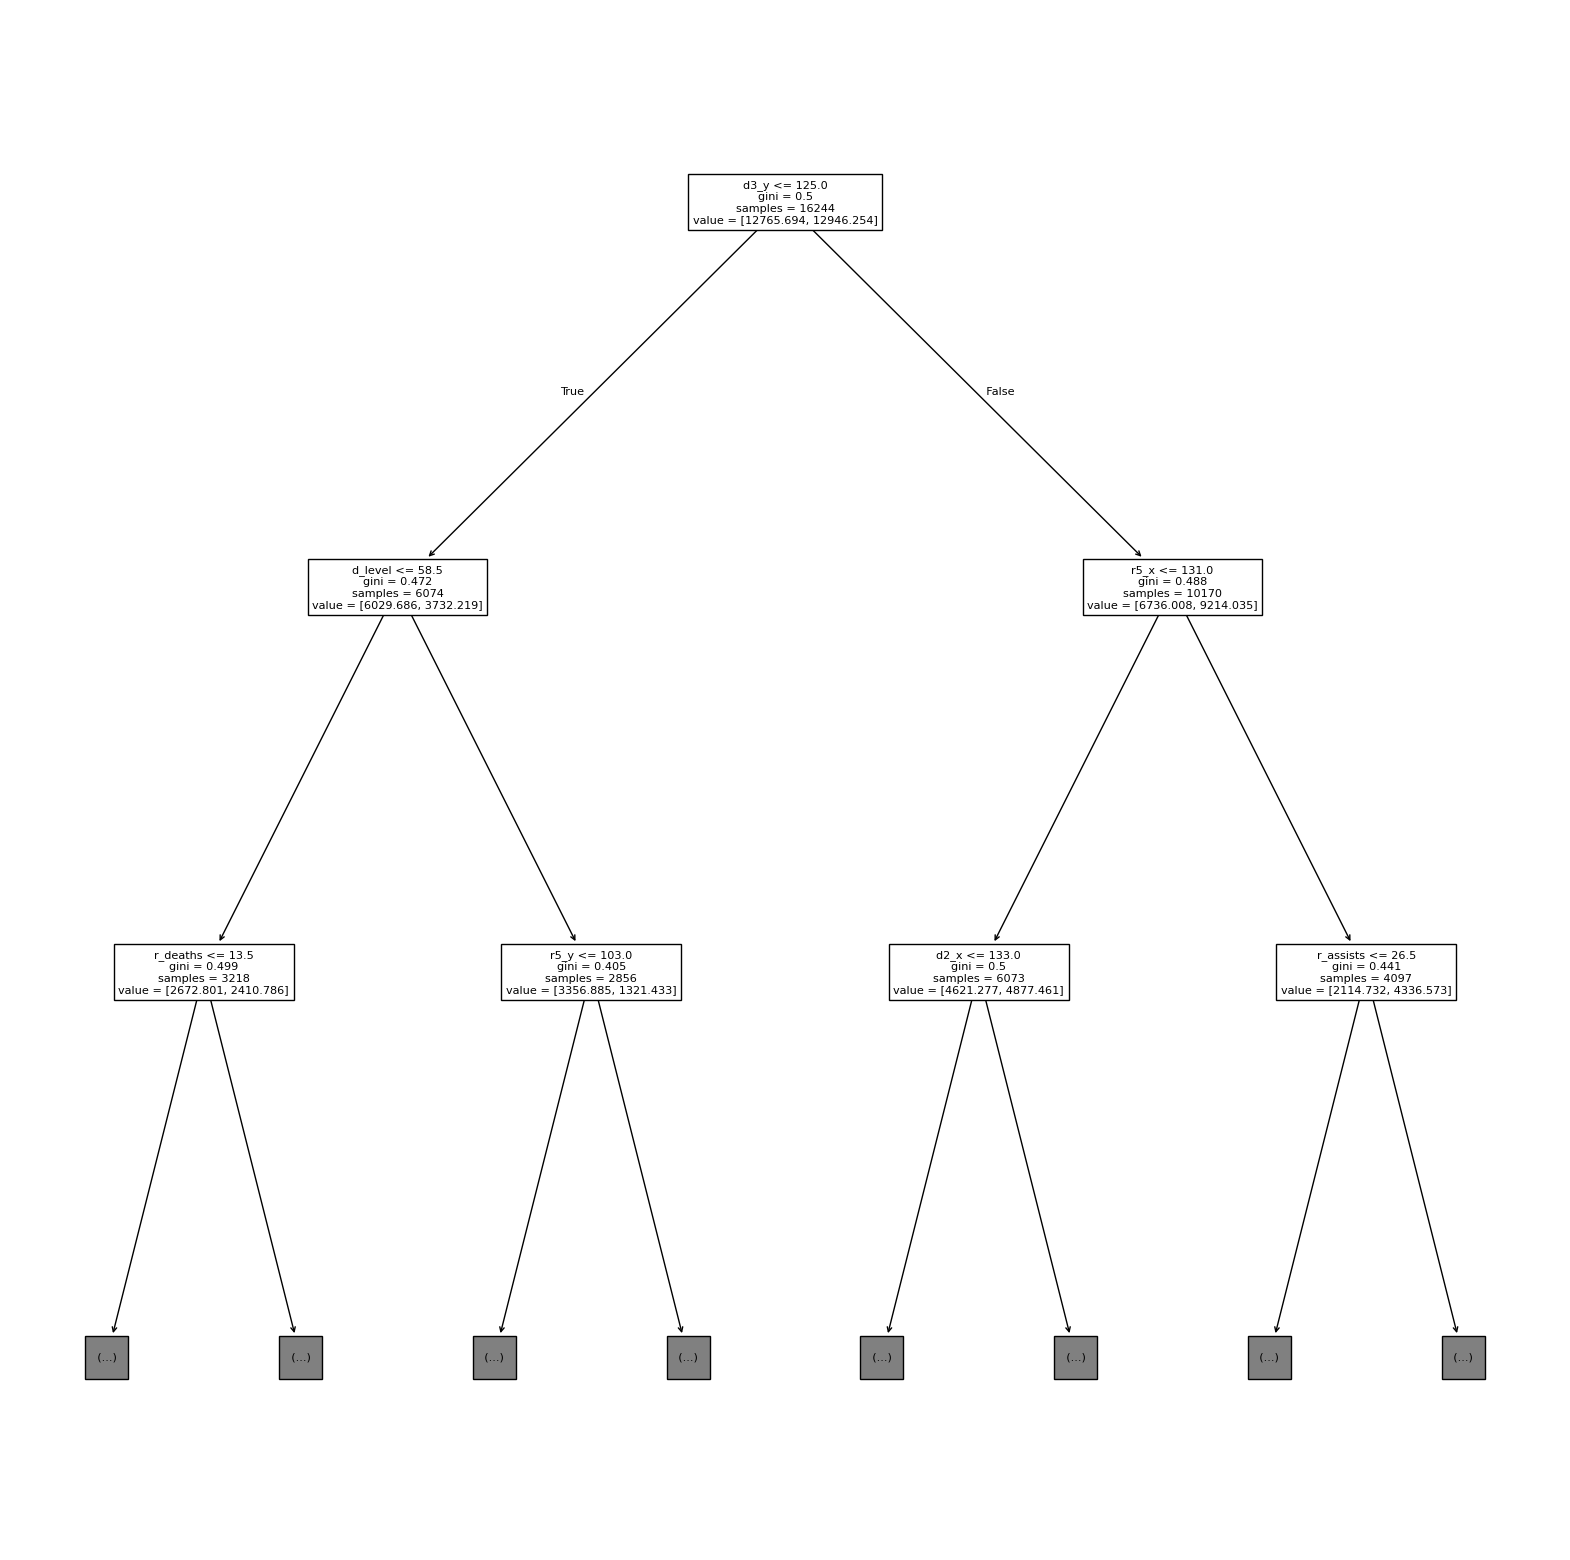

In [25]:
tree = feature_selector.estimators_[1]

plt.figure(figsize=(20,20))
plot_tree(tree,max_depth=2,feature_names=df.columns)
plt.show()